In [2]:
import pandas as pd
df = pd.read_json("./USER_importData/ThunderbeamData.json")

In [4]:
#attributes of each object
df.index

Index([u'cookies', u'firstParty', u'firstPartyHostnames', u'hostname', u'info',
       u'thirdParties'],
      dtype='object')

In [5]:
#all FP+TP urls
df.columns

Index([u'054ccceee06e896a29874c226d6d0dc1.safeframe.googlesyndication.com',
       u'054fc2b5074a4a2f8dd6e69c699e9f17.safeframe.googlesyndication.com',
       u'10288908.fls.doubleclick.net', u'10697551.fls.doubleclick.net',
       u'117259316.intellimizeio.com',
       u'120428bd09076e814343ebaeddbbff1b.safeframe.googlesyndication.com',
       u'15.taboola.com',
       u'1647a730a96d1465a2988c2c24f715d3.safeframe.googlesyndication.com',
       u'1b2cd5b5cbeaff3a04ae4e7ae4391295.safeframe.googlesyndication.com',
       u'27183489bda97137bda9430af1d6a219.safeframe.googlesyndication.com',
       ...
       u'x.bidswitch.net', u'x.skimresources.com', u'x.tagstat.com',
       u'yt3.ggpht.com', u'z.lenmit.com', u'z.moatads.com',
       u'zn0pptmov7gazlq3x-dukeenergyft.siteintercept.qualtrics.com',
       u'zn88jixcivzfb3vpp-nci.siteintercept.qualtrics.com',
       u'zn_ahe7ogbrpdtefrh-healthcare.siteintercept.qualtrics.com',
       u'zneb4sc7kaj0kdsbz-redventures.siteintercept.qualtrics.com

In [16]:
#randomly pick up one object to view 
import random
df[df.columns[random.randint(0,len(df.columns))]]  

cookies                [{u'domain': u'.travelzoo.com', u'name': u'bm_...
firstParty                                                          True
firstPartyHostnames                                                False
hostname                                               www.travelzoo.com
info                                                                 NaN
thirdParties           [www.googletagmanager.com, ssl.tzoo-img.com, a...
Name: www.travelzoo.com, dtype: object

In [22]:
#how to generate the unique third-party second-level domain list of per first-party website
import tldextract  
def second_domain(d):
    try:
        return tldextract.extract(d).registered_domain
    except:
        return d

randomObject = df['www.travelzoo.com'] 
second_domain_Array = map(second_domain,randomObject.thirdParties)
#remove duplicates
unique_TP_array = list(set(second_domain_Array))

In [24]:
print unique_TP_array

[u'dwin1.com', u'akstat.io', u'taboola.com', u'googleadservices.com', u'veinteractive.com', u'ctnsnet.com', u'go-mpulse.net', u'bing.com', u'doubleclick.net', u'adobedtm.com', u'googletagmanager.com', u'tzoo-img.com', u'facebook.com', u'yimg.com', u'googleapis.com', u'adnxs.com', u'liadm.com', u'facebook.net', u'yahoo.com', u'google.com', u'akamaihd.net', u'travelzoo.com', u'google.co.uk', u'gstatic.com', u'admedo.com', u'google-analytics.com', u'outbrain.com']


In [36]:
#Third party entities - domains
import json
with open('entities.json') as f:
    data = json.load(f)
entity = pd.DataFrame.from_dict(data, orient='index').T
pd.DataFrame.from_dict(data, orient='index').T[:5]

,Feedjit,Aegis Group,GeoAds,Komli,AdMatrix,madvertise,Bizo,Revtracks,Belstat,MaxBounty,...,Shortest,NetShelter,Roxr,Genesis Media,AdJuggler,kikin,nrelate,CoreMotives,Lynchpin,Yieldlab
0,feedjit.com,aemedia.com,geoads.com,komli.com,admatrix.jp,madvertise.com,bizo.com,revtrax.com,belstat.be,maxbounty.com,...,shorte.st,netshelter.com,clicky.com,genesismedia.com,adjuggler.com,kikin.com,nrelate.com,coremotives.com,lynchpin.com,yieldlab.de
1,None,bluestreak.com,None,None,None,None,bizographics.com,None,belstat.com,mb01.com,...,None,netshelter.net,getclicky.com,genesismediaus.com,adjuggler.net,None,None,None,lypn.com,yieldlab.net
2,None,dentsuaegisnetwork.com,None,None,None,None,None,None,belstat.de,None,...,None,ziffdavistech.com,roxr.net,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,belstat.fr,None,...,None,None,staticstuff.net,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,belstat.nl,None,...,None,None,None,None,None,None,None,None,None,None


In [51]:
# find the column name of selected value
~(entity.where(entity=='bluestreak.com')).isnull().all()[:5]

Feedjit        False
Aegis Group     True
GeoAds         False
Komli          False
AdMatrix       False
dtype: bool

In [52]:
TFresult_array = ~(entity.where(entity=='bluestreak.com')).isnull().all()
print TFresult_array[TFresult_array==True].index[0]

Aegis Group


In [59]:
def tld(x):
    try:
        return tldextract.extract(x).domain
    except:
        return x

def TP_entity(d):
    TFresult_array = ~(entity.where(entity==d)).isnull().all()
    #check if we have matched:
    if (len(TFresult_array[TFresult_array==True])>0):
        return TFresult_array[TFresult_array==True].index[0]
    else:
        return tld(d)
    
print map(TP_entity,unique_TP_array)

[u'Awin', u'akstat', u'Taboola', u'Google', u'veinteractive', u'ctnsnet', u'Akamai', u'Microsoft', u'Google', u'adobedtm', u'Google', u'tzoo-img', u'Facebook', u'Yahoo!', u'Google', u'AppNexus', u'LiveIntent', u'Facebook', u'Yahoo!', u'Google', u'akamaihd', u'travelzoo', u'Google', u'Google', u'Admedo', u'Google', u'Outbrain']


In [60]:
unique_TPentity = list(set(map(TP_entity,unique_TP_array)))
print unique_TPentity

[u'Admedo', u'Google', u'akamaihd', u'Akamai', u'adobedtm', u'akstat', u'LiveIntent', u'Outbrain', u'tzoo-img', u'veinteractive', u'Awin', u'ctnsnet', u'travelzoo', u'Facebook', u'Yahoo!', u'Microsoft', u'AppNexus', u'Taboola']


In [136]:
#randomly picl up another First party object for comparison
a = unique_TPentity

#second
secondrandomObject = df[df.columns[random.randint(0,len(df.columns))]] 
second_unique_TP_array = list(set(map(second_domain,secondrandomObject.thirdParties)))
second_unique_TPentity = list(set(map(TP_entity,second_unique_TP_array)))
b = second_unique_TPentity

In [140]:
print b

[u'boffosocko', u'Twitter', u'Google', u'indieweb', u'licensebuttons']


In [144]:
#jaccard coefficient
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    unions = len(set(list1).union(set(list2)))
    if intersection==0: return 0
    return 1. * intersection / unions
print jaccard_similarity(a,b)

0.0454545454545


In [128]:
#third
thirdrandomObject = df[df.columns[random.randint(0,len(df.columns))]] 
third_unique_TP_array = list(set(map(second_domain,thirdrandomObject.thirdParties)))
third_unique_TPentity = list(set(map(TP_entity,third_unique_TP_array)))
c = third_unique_TPentity

In [159]:
print c

[u'reddit', u'Google', u'wargaming', u'iMedia', u'Twitter', u'seznam', u'd-bi', u'Microsoft', u'Facebook', u'Taboola', u'Amazon.com', u'gcdn', u'Mail.Ru', u'redditstatic', u'quantcount', u'Quantcast', u'AppNexus', u'Yandex']


In [160]:
print jaccard_similarity(a,c)
print jaccard_similarity(b,c)

0.227272727273
0.0909090909091


In [ ]:
#####Capture all First parties

In [166]:
from collections import Counter
def countFP(json_data):
    list_json = json_data.values()
    count_lst = []
    for request_e in list_json:
        if isinstance(request_e,dict)==False:
            continue
        if request_e['firstParty'] == True:
            count_lst.append(str(second_domain(request_e['hostname'])))
    count_lst = Counter(count_lst)
    count_lst = dict(count_lst.most_common(len(count_lst))).keys()
    return count_lst
with open("./USER_importData/ThunderbeamData.json","r") as f:
    FPlist = countFP(json.load(f))     #71 FPs
    print FPlist

['ajnrdigest.org', 'flyfrontier.com', 'revolve.com', 'arsenal.com', 'ajnr.org', 'xfinity.com', 'alz.org', 'animelyrics.com', 'lonelyplanet.com', 'idf.org', 'boden.co.uk', 'informationweek.com', 'ikea.com', 'hi5.com', 'wikiquote.org', 'accuweather.com', 'r-project.org', 'w3schools.com', 'papersource.com', 'google.com', 'starnewsonline.com', 'tableau.com', 'fabulousafter40.com', 'porkrind.org', 'ballarddesigns.com', 'alexa.com', 'nature.com', 'rt.com', 'moviefone.com', 'islamicfinder.org', 'theguardian.com', 'thewalkingcompany.com', 'naturegirls.com', 'healthcare.gov', 'duke-energy.com', 'vfb.de', 'cornell.edu', 'mathopenref.com', 'lego.com', 'cancer.gov', 'citeulike.org', 'abc.net.au', 'nationmaster.com', 'cams.com', 'dmoz.org', 'neurips.cc', 'bet365.com', 'salesforce.com', 'futilestruggles.com', 'disney.co.uk', 'spearmintrhino.com', 'go.com', 'amarujala.com', 'cam.ac.uk', 'northernangels.co.uk', 'discoveryuk.com', 'criterion.com', 'accor.com', 'indieweb.org', 'rabbit.org', 'gamepuppet.

In [264]:
def countFPurls(json_data):
    list_json = json_data.values()
    count_lst = []
    for request_e in list_json:
        if isinstance(request_e,dict)==False:
            continue
        if request_e['firstParty'] == True:
            count_lst.append((request_e['hostname']))
    count_lst = Counter(count_lst)
    count_lst = dict(count_lst.most_common(len(count_lst))).keys()
    return count_lst
with open("./USER_importData/ThunderbeamData.json","r") as f:
    FPurls = countFPurls(json.load(f))     #71 FPs
    print FPurls

[u'www.cancer.gov', u'eu.starnewsonline.com', u'www.ballarddesigns.com', u'www.fellowshipone.com', u'www.tableau.com', u'www.rt.com', u'www.accuweather.com', u'www.criterion.com', u'vfbtv.vfb.de', u'www.xfinity.com', u'secure.hi5.com', u'www.nationmaster.com', u'www.papersource.com', u'worldoftanks.eu', u'www.gamespot.com', u'www.islamicfinder.org', u'www.google.co.uk', u'www.openstreetmap.org', u'www.bet365.com', u'www.ikea.com', u'www.salesforce.com', u'www.theguardian.com', u'www.al-islam.org', u'www.moviefone.com', u'www.alexa.com', u'www.duke-energy.com', u'www.nature.com', u'www.healthcare.gov', u'neurips.cc', u'porkrind.org', u'www.evertonfc.com', u'www.northernangels.co.uk', u'citeulike.org', u'www.undergraduate.study.cam.ac.uk', u'gb.accounts.ikea.com', u'www.naturegirls.com', u'www.ajnr.org', u'mathopenref.com', u'www.boden.co.uk', u'www.abc.net.au', u'www.cam.ac.uk', u'ajnrdigest.org', u'www.wikiquote.org', u'www.cornell.edu', u'idf.org', u'www.arsenal.com', u'disney.go.com'

In [ ]:
#####Category the First-party website

In [215]:
#16 Alexa category for websites
cate_lst=[
 'adult',
 'arts',
 'business',
 'computers',
 'games',
 'health',
 'home',
 'kids',
 'news',
 'recreation',
 'reference',
 'regional',
 'science',
 'shopping',
 'society',
 'sports']
FPcate_path='../FPcategory/site_cate_.csv'

In [210]:
import difflib
difflib.get_close_matches('computer', cate_lst)

['computers']

In [176]:
df_FPcates = pd.read_csv(FPcate_path)
df_FPcates.sample(n=5)  # randomly print 5 rows

,category,domain
21829,Adult,therapie-und-bizarrzentrum.de
247205,Business,advancenow.com
362743,Computers,aladdin.com
466740,Health,hodesnauser.com
142741,Business,quarterridgetrailers.com


In [267]:
#first, create an empty dictionary to store the count of categories
dictOfCates = { i : 0 for i in cate_lst }
print dictOfCates

SitesOfCates = { i : [] for i in cate_lst }
print SitesOfCates

{'arts': 0, 'kids': 0, 'shopping': 0, 'reference': 0, 'business': 0, 'science': 0, 'computers': 0, 'recreation': 0, 'sports': 0, 'society': 0, 'regional': 0, 'health': 0, 'adult': 0, 'home': 0, 'games': 0, 'news': 0}
{'arts': [], 'kids': [], 'shopping': [], 'reference': [], 'business': [], 'science': [], 'computers': [], 'recreation': [], 'sports': [], 'society': [], 'regional': [], 'health': [], 'adult': [], 'home': [], 'games': [], 'news': []}


In [268]:
def FPcategorize(site,urls):
    FP_array = df_FPcates[df_FPcates.domain==site].category
    if len(FP_array)>0:
        for c in FP_array:
            dictOfCates[c.lower()] = dictOfCates[c.lower()]+1
            SitesOfCates[c.lower()].append(urls)
    else:
        print "uncategorized:",site

In [269]:
FPcateResult = map(FPcategorize,FPlist,FPurls)

uncategorized: ajnrdigest.org
uncategorized: neurips.cc
uncategorized: discoveryuk.com
uncategorized: indieweb.org
uncategorized: worldoftanks.eu
uncategorized: None
uncategorized: None
uncategorized: None
uncategorized: None
uncategorized: None


In [270]:
print dictOfCates

{'arts': 16, 'kids': 20, 'shopping': 7, 'reference': 13, 'business': 10, 'science': 13, 'computers': 18, 'recreation': 12, 'sports': 4, 'society': 6, 'regional': 10, 'health': 13, 'adult': 6, 'home': 6, 'games': 10, 'news': 10}


In [271]:
pd.DataFrame.from_dict(SitesOfCates, orient='index').T[:5]

,arts,kids,shopping,reference,business,science,computers,recreation,sports,society,regional,health,adult,home,games,news
0,www.rt.com,www.criterion.com,secure.hi5.com,www.nationmaster.com,www.nationmaster.com,www.ballarddesigns.com,www.rt.com,eu.starnewsonline.com,www.fellowshipone.com,worldoftanks.eu,www.rt.com,www.tableau.com,www.ikea.com,www.ikea.com,www.criterion.com,www.islamicfinder.org
1,www.criterion.com,vfbtv.vfb.de,www.papersource.com,www.gamespot.com,www.ikea.com,www.islamicfinder.org,www.nationmaster.com,vfbtv.vfb.de,www.naturegirls.com,www.ikea.com,www.papersource.com,www.accuweather.com,citeulike.org,www.al-islam.org,www.ikea.com,www.ikea.com
2,www.gamespot.com,worldoftanks.eu,www.bet365.com,www.ikea.com,gb.accounts.ikea.com,www.google.co.uk,worldoftanks.eu,www.gamespot.com,www.ufc.com,porkrind.org,www.islamicfinder.org,www.xfinity.com,www.cornell.edu,www.undergraduate.study.cam.ac.uk,www.moviefone.com,www.salesforce.com
3,www.ikea.com,www.gamespot.com,www.ikea.com,www.theguardian.com,www.ajnr.org,www.ikea.com,www.openstreetmap.org,www.ikea.com,www.w3schools.com,www.ajnr.org,www.ikea.com,www.ikea.com,www.amarujala.com,www.ajnr.org,www.ajnr.org,www.nature.com
4,neurips.cc,www.islamicfinder.org,www.alexa.com,www.ajnr.org,www.boden.co.uk,www.nature.com,www.ikea.com,www.ajnr.org,None,www.alz.org,www.healthcare.gov,www.nature.com,www.nyu.edu,ajnrdigest.org,www.boden.co.uk,www.evertonfc.com


In [254]:
######Create Matrix for storing Jaccard Similary in/cross FP categories

In [319]:
df_jaccard = pd.DataFrame(index=cate_lst,columns=cate_lst).fillna(0)

In [320]:
df_jaccard

,adult,arts,business,computers,games,health,home,kids,news,recreation,reference,regional,science,shopping,society,sports
adult,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
arts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
computers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
games,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
home,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
news,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
recreation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [260]:
import itertools
# different Possibility of pairwise combination in cate_lst
cate_pairs = list(itertools.combinations(cate_lst, 2))
print cate_pairs

[('adult', 'arts'), ('adult', 'business'), ('adult', 'computers'), ('adult', 'games'), ('adult', 'health'), ('adult', 'home'), ('adult', 'kids'), ('adult', 'news'), ('adult', 'recreation'), ('adult', 'reference'), ('adult', 'regional'), ('adult', 'science'), ('adult', 'shopping'), ('adult', 'society'), ('adult', 'sports'), ('arts', 'business'), ('arts', 'computers'), ('arts', 'games'), ('arts', 'health'), ('arts', 'home'), ('arts', 'kids'), ('arts', 'news'), ('arts', 'recreation'), ('arts', 'reference'), ('arts', 'regional'), ('arts', 'science'), ('arts', 'shopping'), ('arts', 'society'), ('arts', 'sports'), ('business', 'computers'), ('business', 'games'), ('business', 'health'), ('business', 'home'), ('business', 'kids'), ('business', 'news'), ('business', 'recreation'), ('business', 'reference'), ('business', 'regional'), ('business', 'science'), ('business', 'shopping'), ('business', 'society'), ('business', 'sports'), ('computers', 'games'), ('computers', 'health'), ('computers', 

In [ ]:
## Generate a dictionary of third-party list for all FP sites
## for the rest calculation

In [278]:
TPOfSites = { i : TPentity(i) for i in FPurls }

In [280]:
from __future__ import division

## list of TP entities of FP site
def TPentity(site):
    randomObject = df[site] 
    unique_TP_array = list(set(map(second_domain,randomObject.thirdParties)))
    unique_TPentity = list(set(map(TP_entity,unique_TP_array)))
    return unique_TPentity

## Jaccard of two sites
def Jaccard(site1,site2):
    #return jaccard_similarity(TPentity(site1),TPentity(site2))
    return jaccard_similarity(TPOfSites[site1],TPOfSites[site2])

## Average Jaccard of each pair of FPs between two categories
def Jaccard_TwoCategory(cate1,cate2):
    site_firstCate = SitesOfCates[cate1]
    site_secondCate = SitesOfCates[cate2]
    JaccardLst = [Jaccard(x,y) for x in site_firstCate for y in site_secondCate]
    avg = sum(JaccardLst)/len(JaccardLst)
    return avg

In [322]:
for eachPair in cate_pairs:
    firstCate = eachPair[0]
    secondCate = eachPair[1]
    df_jaccard.loc[firstCate,secondCate]=Jaccard_TwoCategory(firstCate,secondCate)

In [323]:
df_jaccard

,adult,arts,business,computers,games,health,home,kids,news,recreation,reference,regional,science,shopping,society,sports
adult,0,0.024945,0.031579,0.024976,0.035088,0.028003,0.028509,0.031579,0.031798,0.037463,0.030870,0.023246,0.028846,0.031955,0.030702,0.033443
arts,0,0.000000,0.026316,0.020833,0.026398,0.024165,0.023163,0.026398,0.026234,0.031044,0.026063,0.017270,0.023722,0.022791,0.022067,0.023232
business,0,0.000000,0.000000,0.031067,0.037895,0.033603,0.033114,0.035329,0.036579,0.043092,0.035020,0.022105,0.033097,0.041541,0.029167,0.030592
computers,0,0.000000,0.000000,0.000000,0.028509,0.025360,0.024245,0.027485,0.027705,0.031433,0.027103,0.018348,0.025079,0.029449,0.024610,0.024488
games,0,0.000000,0.000000,0.000000,0.000000,0.028644,0.026754,0.037303,0.032632,0.041447,0.032085,0.023553,0.029656,0.039474,0.028289,0.034539
health,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.029352,0.030061,0.034109,0.034076,0.030053,0.019130,0.030676,0.028629,0.027834,0.026316
home,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027522,0.033333,0.033443,0.028677,0.020175,0.029184,0.029449,0.028509,0.024123
kids,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034803,0.040077,0.032743,0.022895,0.031528,0.033365,0.028509,0.032237
news,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039254,0.032895,0.025921,0.036741,0.032143,0.030044,0.032237
recreation,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039305,0.024342,0.034413,0.040257,0.030885,0.037007


In [292]:
########## ploting the sites in the same category

In [357]:
def avgJaccard_sameCate(cate):
    pairs = list(itertools.combinations(SitesOfCates[cate], 2))
    JaccardLst = []
    for e in pairs:
        site_first = e[0]
        site_second = e[1]
        JaccardLst.append(jaccard_similarity(TPOfSites[site_first],TPOfSites[site_second]))
    avg = sum(JaccardLst)/len(JaccardLst)
    return avg

In [359]:
for cate in cate_lst:
    df_jaccard.loc[cate,cate]=avgJaccard_sameCate(cate)

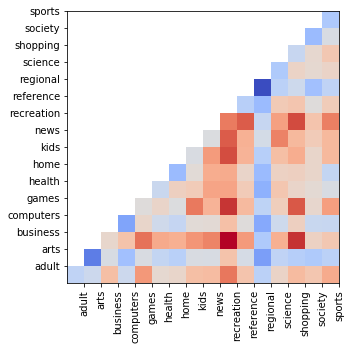

In [365]:
from matplotlib import pyplot as plt
import numpy as np

mask =  np.tri(df_jaccard.shape[0], k=-1)
df_jaccard_mask = np.ma.array(df_jaccard, mask=mask) # mask out the lower triangle



fig = plt.figure(figsize=(5, 5))
#passed DataFrame
plt.imshow(df_jaccard_mask, origin='lower',cmap='coolwarm')
plt.grid(False)

plt.yticks(np.arange(0.5, len(df_jaccard.index), 1), df_jaccard.index)
plt.xticks(np.arange(0.5, len(df_jaccard.columns), 1), df_jaccard.columns)
plt.xticks(rotation=90)
plt.show()

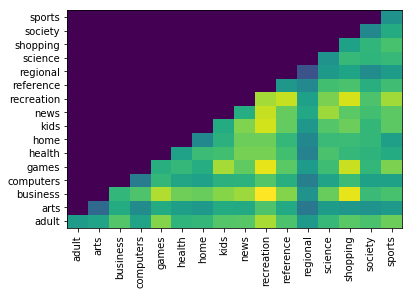

In [361]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt


plt.pcolor(df_jaccard)
plt.yticks(np.arange(0.5, len(df_jaccard.index), 1), df_jaccard.index)
plt.xticks(np.arange(0.5, len(df_jaccard.columns), 1), df_jaccard.columns)
plt.xticks(rotation=90)
plt.show()

In [366]:
df_jaccard.T.round(3).style.background_gradient(cmap='Blues')

,adult,arts,business,computers,games,health,home,kids,news,recreation,reference,regional,science,shopping,society,sports
adult,0.024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
arts,0.025,0.015,0,0,0,0,0,0,0,0,0,0,0,0,0,0
business,0.032,0.026,0.028,0,0,0,0,0,0,0,0,0,0,0,0,0
computers,0.025,0.021,0.031,0.018,0,0,0,0,0,0,0,0,0,0,0,0
games,0.035,0.026,0.038,0.029,0.027,0,0,0,0,0,0,0,0,0,0,0
health,0.028,0.024,0.034,0.025,0.029,0.025,0,0,0,0,0,0,0,0,0,0
home,0.029,0.023,0.033,0.024,0.027,0.029,0.02,0,0,0,0,0,0,0,0,0
kids,0.032,0.026,0.035,0.027,0.037,0.03,0.028,0.026,0,0,0,0,0,0,0,0
news,0.032,0.026,0.037,0.028,0.033,0.034,0.033,0.035,0.027,0,0,0,0,0,0,0
recreation,0.037,0.031,0.043,0.031,0.041,0.034,0.033,0.04,0.039,0.037,0,0,0,0,0,0
